### Lung Disease Diagnosis Using Chest X-rays

In [4]:
# Importing All required packages
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Storing directory paths
cv19_dir = 'X-RayDataset/COVID19'
pn_dir = 'X-RayDataset/PNEUMONIA'
tb_dir = 'X-RayDataset/TURBERCULOSIS'
normal_dir = 'X-RayDataset/NORMAL'

# Storing Image sizes
img_width, img_height = 150, 150

In [8]:
# Function to load images
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename) # getting individual img paths
        img = load_img(img_path, target_size=(img_height, img_width)) # imposing height and width
        img_array = img_to_array(img) # converting to an image array
        images.append(img_array) # adding image to images[]
        labels.append(label) # adding label to labels[]
    return images, labels

In [31]:
# Loading each directory (May need to reshape due to data imbalances)
cv19_images, cv19_labels = load_images(cv19_dir, 3) # 3 for covid
pn_images, pn_labels = load_images(pn_dir, 2) # 2 for pneumonia
tb_images, tb_labels = load_images(tb_dir, 1) # 1 for tb
normal_images, normal_labels = load_images(normal_dir, 0) # 0 for healthy


In [33]:
# Slicing to have only 500 images for each category (to prevent imbalances)
cv19_images, cv19_labels = cv19_images[:500], cv19_labels[:500]
pn_images, pn_labels = pn_images[:500], pn_labels[:500]
tb_images, tb_labels = tb_images[:500], tb_labels[:500]
normal_images, normal_labels = normal_images[:500], normal_labels[:500] 

# Making sure no errors
print(
    "Length of each array: ",
    len(cv19_images),
    len(cv19_labels),
    len(pn_images),
    len(pn_labels),
    len(tb_images),
    len(tb_labels),
    len(normal_images),
    len(normal_labels)
)

Length of each array:  500 500 500 500 500 500 500 500


In [34]:
# Combining all arrays into one array for images and labels
all_images = cv19_images + pn_images + tb_images + normal_images
all_labels = cv19_labels + pn_labels + tb_labels + normal_labels

Total length of images:  2000 
Total length of labels:  2000


In [35]:
# Converting to Tensorflow dataframe
all_images = tf.convert_to_tensor(all_images, dtype=tf.float32) / 255.0 # Normalize and convert
all_labels = tf.convert_to_tensor(all_labels, dtype=tf.float32)

In [36]:
# Displaying total length of images and labels array
print(f'Total amount of images: {len(all_images)}')
print(f'Total amount of labels: {len(all_labels)}')

Total amount of images: 2000
Total amount of labels: 2000


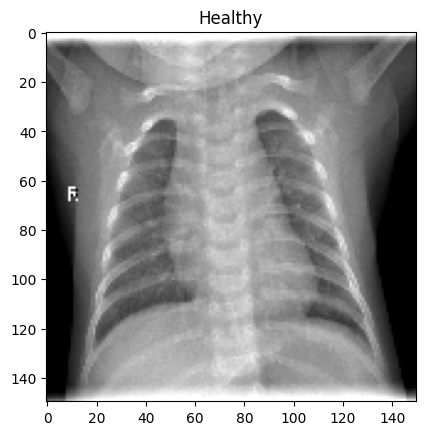

In [45]:
# Displaying a random image and its label
index = 1600

plt.imshow(all_images[index])
plt.title("Covid" if all_labels[index] == 3.0 else "Pneumonia" if all_labels[index] == 2.0 else "Tuberculosis" if all_labels[index] == 1.0 else "Healthy" )

plt.show()